In [1]:
import pandas as pd
data=pd.read_csv("C:/Users/User/Documents/fipe_2022.csv")
data.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


**cleaning data**


In [2]:
data.isnull().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
age_years             0
dtype: int64

    tidak ada missing value pada dataset ini

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
year_of_reference     290275 non-null int64
month_of_reference    290275 non-null object
fipe_code             290275 non-null object
authentication        290275 non-null object
brand                 290275 non-null object
model                 290275 non-null object
fuel                  290275 non-null object
gear                  290275 non-null object
engine_size           290275 non-null float64
year_model            290275 non-null int64
avg_price_brl         290275 non-null float64
age_years             290275 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB
None


    terdapat 12 varuabel dimana average price sebagai variabel dependent dan sisanya merupakan variabel independent. Data ini diambil selama tahun 2022 dari Januari sampai Desember

**EDA**

In [4]:
cat=['fuel','gear']
from matplotlib import pyplot as plt
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
for i,j in zip(range(2),cat):
    hitung=data[j].value_counts()
    hitung.plot(kind='bar',ax=ax[i])

    Dari gambar di atas, untuk variabel gasoline paling besar jumlahnya dibandingkan diesel dan alkoho, sedangkan untuk variabel gear jenis manual lebih besar dibantingkan dengan jenis automatic

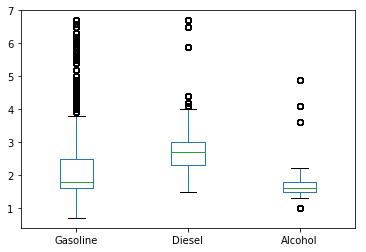

In [5]:
#variabel fuel vs engine size persebaran data
cat_fuel=data['fuel'].unique().tolist()
from matplotlib import pyplot as plt
kump={}
for i in cat_fuel:
    ambil=data[data['fuel']==i]['engine_size']
    kump[i]=ambil
dataconv=pd.DataFrame(kump)
dataconv.plot(kind='box')

    Persebaran data untuk gasoline lebih besar dari diesel dan alcohol, shape berbentuk skewed, dan memiliki banyak outlier. Untuk Diesel shape berbentuk normal, median lebih tinggi dibandingkan dengan gasoline dan alcohol. Sedangkan untuk alkohol persebaran data paling kecil engine size dibandingkan gasoline dan diese

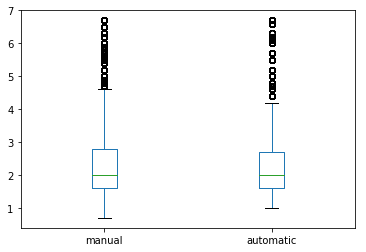

In [6]:
#variabel gear vs engine size persebaran data
cat_gear=data['gear'].unique().tolist()
from matplotlib import pyplot as plt
kump={}
for i in cat_gear:
    ambil=data[data['gear']==i]['engine_size']
    kump[i]=ambil
dataconv=pd.DataFrame(kump)
dataconv.plot(kind='box')

    Kedua variabel persebaran data  dan nilai median untuk ukuran mesin hampir sama

(0, 450000)

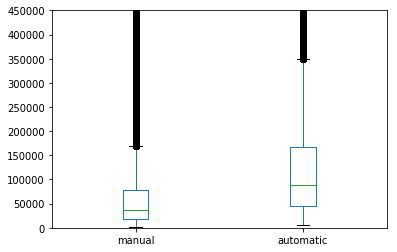

In [7]:
#variabel gear vs price persebaran data
cat_gear=data['gear'].unique().tolist()
from matplotlib import pyplot as plt
kump={}
for i in cat_gear:
    ambil=data[data['gear']==i]['avg_price_brl']
    kump[i]=ambil
dataconv=pd.DataFrame(kump)
dataconv.plot(kind='box')
plt.ylim(0,450000)

    Harga rata-rata mobil untuk transmisi otomatis lebih tinggi dibandingkan dengan harga rata-rata transmisi manual baik nilai median dan persebaran datanya

(0, 450000)

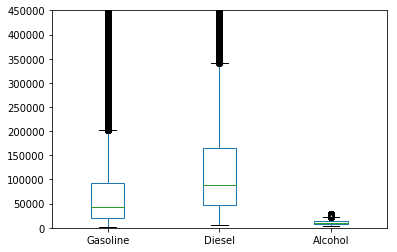

In [8]:
#variabel fuel vs price persebaran data
cat_fuel=data['fuel'].unique().tolist()
from matplotlib import pyplot as plt
kump={}
for i in cat_fuel:
    ambil=data[data['fuel']==i]['avg_price_brl']
    kump[i]=ambil
dataconv=pd.DataFrame(kump)
dataconv.plot(kind='box')
plt.ylim(0,450000)

    harga rata-rata mobil untuk berbahan bakar diesel lebih tinggi dibandingkan dengan bahan bakar gasoline dan alkohol dan persebaran data lebih besar diesel juga

In [9]:
data_jan=data[data['month_of_reference']=='June']
print(data_jan.shape[0]/30)

804.1


In [10]:
cat_car=data['brand'].unique().tolist()
print(cat_car)

['Acura', 'Agrale', 'Alfa Romeo', 'AM Gen', 'Asia Motors', 'ASTON MARTIN', 'Audi', 'Baby', 'BMW', 'BRM', 'CAB Motors', 'Cadillac', 'CBT Jipe', 'CHANA', 'CHANGAN', 'Caoa Chery', 'GM - Chevrolet', 'Chrysler', 'Citroën', 'Cross Lander', 'Daewoo', 'Daihatsu', 'Dodge', 'EFFA', 'Engesa', 'Envemo', 'Ferrari', 'Fiat', 'Fibravan', 'Ford', 'FOTON', 'Fyber', 'GEELY', 'GREAT WALL', 'HAFEI', 'Honda', 'Hyundai', 'Isuzu', 'IVECO', 'JAC', 'Jaguar', 'Jeep', 'JINBEI', 'JPX', 'Kia Motors', 'Lada', 'Land Rover', 'Lexus', 'LIFAN', 'LOBINI', 'Lotus', 'Mahindra', 'Maserati', 'Matra', 'Mazda', 'Mclaren', 'Mercedes-Benz', 'Mercury', 'MG', 'MINI', 'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Pontiac', 'Porsche', 'RAM', 'RELY', 'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Saturn', 'Seat', 'SHINERAY', 'smart', 'SSANGYONG', 'Subaru', 'Suzuki', 'TAC', 'Toyota', 'Troller', 'VW - VolksWagen', 'Volvo', 'Wake', 'Walk']


    terdapat banyak brand pada dataset ini kita akan kelaskan berdasarkan asalnya

In [11]:
americans=['Acura','AM Gen','Cadillac','Chrysler','Dodge','Jeep','RAM','Saturn','Chevrolet (GM)','Ford','Mercury','Pontiac','Plymouth']
europans=['Alfa Romeo','Aston Martin','Audi','BMW','Ferrari','Fiat','Jaguar','Land Rover','Lotus','Maserati','Mercedes-Benz','Mini','Peugeot','Porsche','Rolls-Royce','Saab','Volvo','VW - Volkswagen']
asian=[ 'Asia Motors','Changan','Chery (Caoa Chery)','Daihatsu','Honda','Hyundai','Isuzu','JAC','Jinbei','Kia Motors','Lexus','Lifan','Mazda','Mitsubishi','Nissan','Subaru','Suzuki','Toyota']
brazilian=['Agrale','Baby','BRM','CBT Jipe','Fibravan','Envemo','IVECO','Troller','SHINERAY','Wake']

In [12]:
def kelaskan (x):
    if x in americans:
        return 'americans'
    elif x in europans:
        return 'europe'
    elif x in asian:
        return 'asia'
    else:
        return 'brazil'
data['kelas']=data['brand'].apply(kelaskan)
print(data['kelas'].head())

0    americans
1    americans
2    americans
3    americans
4    americans
Name: kelas, dtype: object


kelas                  americans          asia        brazil         europe
month_of_reference                                                         
January             59239.533815  72647.083385  62632.316339  208835.194627
February            61158.392736  73825.097445  63597.628994  211744.936755
March               62397.989450  74620.821870  64834.715044  214879.812777
April               62775.090426  74983.621774  65261.253752  217382.261349
May                 64167.646189  76150.595767  65055.410336  219393.394280
June                64674.121831  76271.039809  65593.263437  221971.058514
July                64585.990166  75674.678779  65745.039445  222098.449165
August              64983.915722  75721.223785  65972.670265  221313.254277
September           65863.761905  75893.512392  66238.017763  224227.052692
October             66516.330320  75360.903587  66208.427611  223094.967961
November            67252.771107  75096.329809  66155.739998  226778.276310
December    

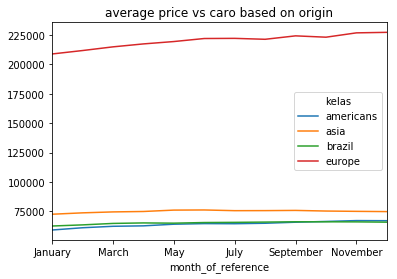

In [21]:
#contingency table
import numpy as np
month=data['month_of_reference'].unique().tolist()
table_contingency=pd.pivot_table(data,index='month_of_reference',columns='kelas',values='avg_price_brl',aggfunc='mean')
table_new=table_contingency.reindex(month)
print(table_new)
table_new.plot(title='average price vs caro based on origin')

    harga rata-rata paling tinggi didominasi oleh mobil dari eropa, diikuti mobil dari asia, kemudian untuk mobil dari brazil dan amerika memiliki perkembangan harga rata-rata dari bulan ke bulan yang hampir serupa

- base on gear

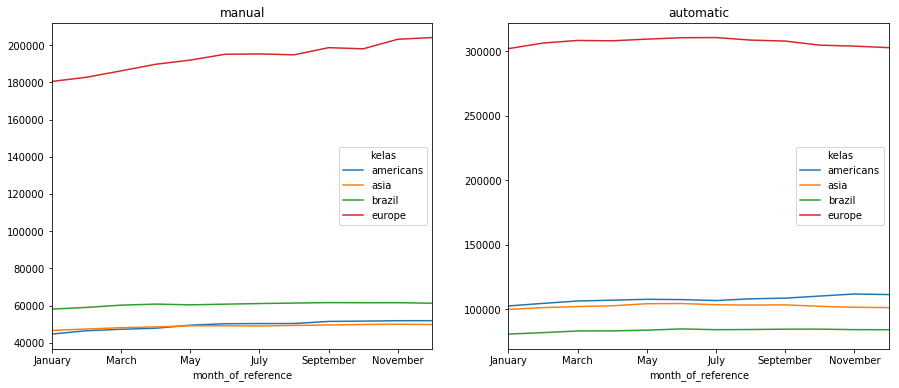

In [24]:
from matplotlib import pyplot as plt
gear=data['gear'].unique().tolist()
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
for i,j in zip(range(2),gear):
    data_g=data[data['gear']==j]
    month=data['month_of_reference'].unique().tolist()
    table_contingency=pd.pivot_table(data_g,index='month_of_reference',columns='kelas',values='avg_price_brl',aggfunc='mean')
    table_new=table_contingency.reindex(month)
    table_new.plot(ax=ax[i],title= j)
    

    Untuk transmisi manual harga mobil eropa lebih tunggi dibandingkan dengan lainnya dan sepanjang bulan mengalami kenaikan polanya. diikuti mobil dari brazil yang polanya konstan di harga 60000. Untuk mobil asia dan americans trendnya hampir serupa dan mengalami kenaikan polanya
    
    Untuk transmisi otomatis, mobil eropa juga menjadi mobil harga rata-rata tertinggi dengan harga 300000 lebih tinggi dari mobil eropa transmisi manual namun trend nya pada bulan September sampai December mengalami penurunan. Kemudia diikuti mobil american yang mengalami trend kenaikan dan selanjutnya mobil asia dengan harga hampir mirip dengan mobil americans namun trend yang dibentuk cenderung konstan. Mobil asa brazil menjadi yang terendah harganya di transmisi otomatis ini.

- based on fuel

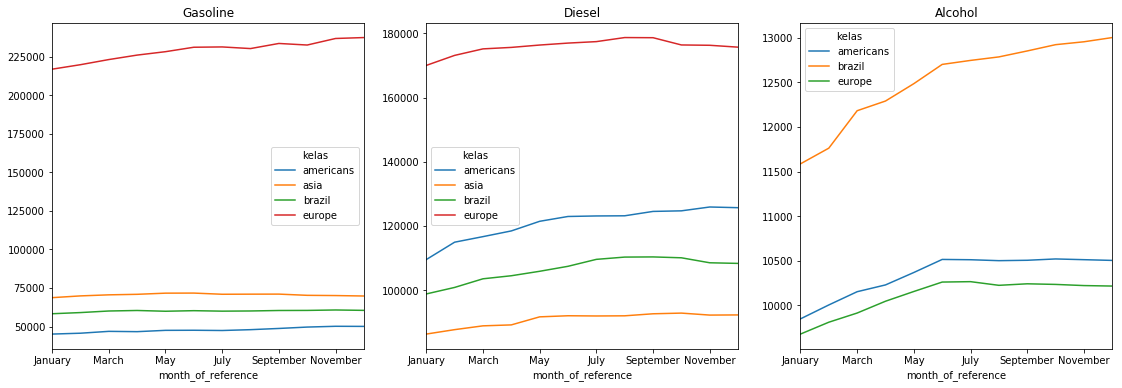

In [37]:
from matplotlib import pyplot as plt
fuel=data['fuel'].unique().tolist()
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(19,6))
for i,j in zip(range(3),fuel):
    data_g=data[data['fuel']==j]
    month=data['month_of_reference'].unique().tolist()
    table_contingency=pd.pivot_table(data_g,index='month_of_reference',columns='kelas',values='avg_price_brl',aggfunc='mean')
    table_new=table_contingency.reindex(month)
    table_new.plot(ax=ax[i],title= j)

    untuk bahan bakar gasoline mobil eropa masih menjadi harga tertinggi dengan trend meningkat, diikuti oleh mobil asia, brazil dan americans dengan pola harga rata-rata yang konstan.
    
    Untuk bahan bakar diesel, masih mobil eropa namun harga mengalami penurunan pada bulan Oktober sampai Desember dan harga lebih rendah dari gasoline. diikuti mobil americans, brazilm dan asia yang trend nya cenderung meningkat
    
    Untuk bahan bakar alcohol, hanya 3 mobil saja dan mobil brazil mengalami trend harga meningkat yang meningkat setiap bulannya dan menjadi yang tertinggi dibandingkan dengan mobil amerika daneropa, Mobil amerika dan eropa mengalami peningkatan dari Januari sampai Juni, kemudian harga cenderung konstan.

    Kesimpulan mobil eropa memiliki harga rata-rata tinggi karena biaya produksi tinggi, biaya bahan baku, penggunaan teknologi dan brand positionung yang tinggi menyebabkan harga mobil menjadi meningkat